In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/lending club dataset.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

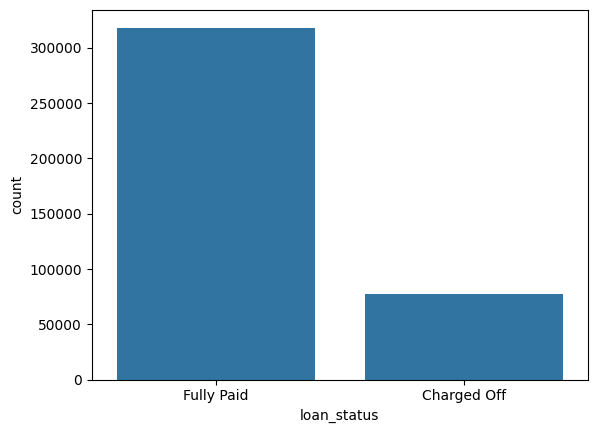

In [5]:
sns.countplot(x='loan_status', data=df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

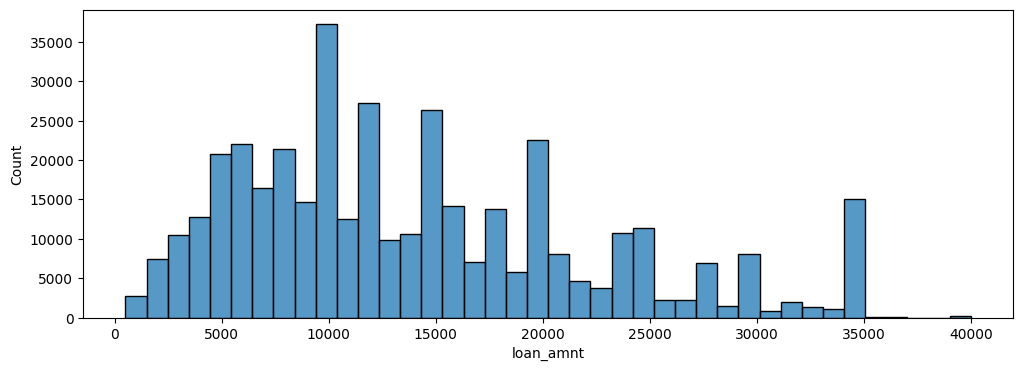

In [6]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'], bins=40, kde=False)

<Axes: xlabel='installment', ylabel='loan_amnt'>

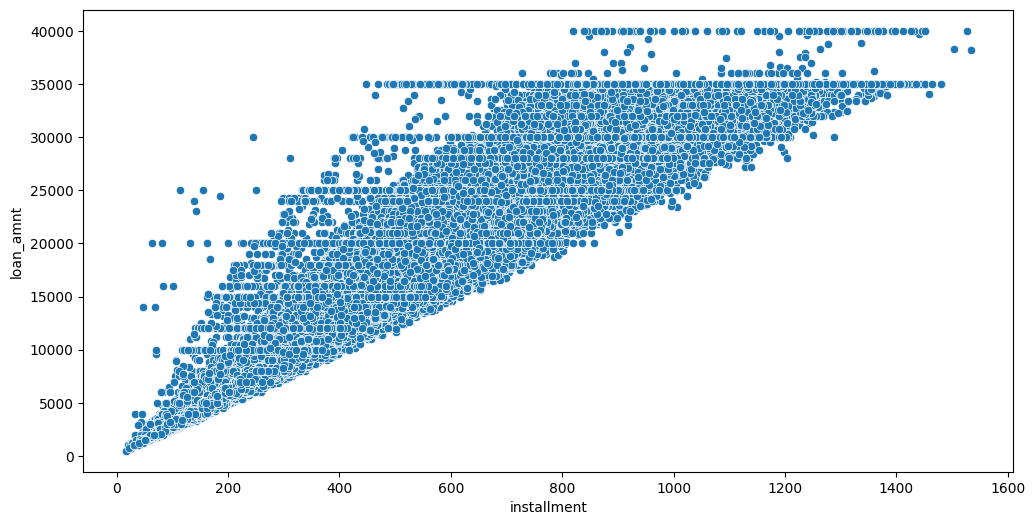

In [7]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

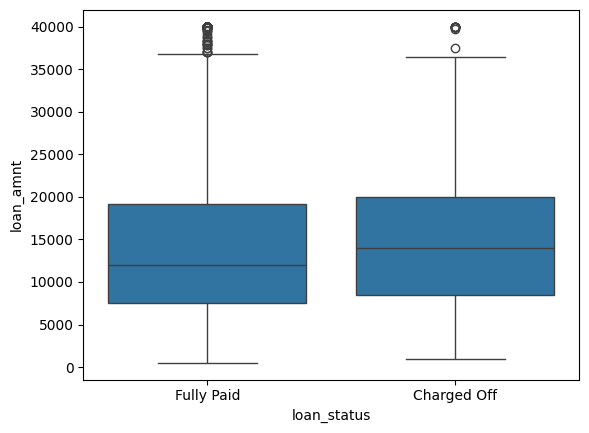

In [8]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [9]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [10]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [11]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

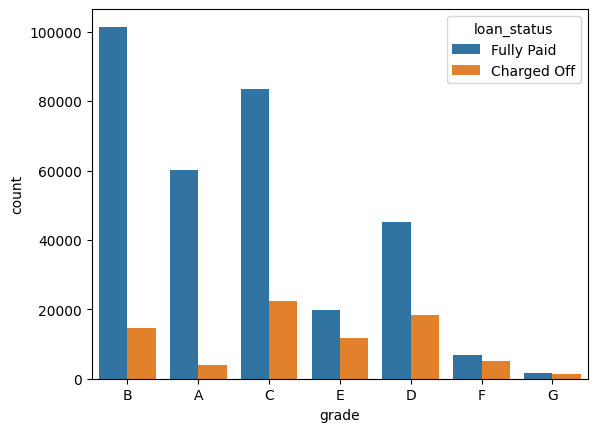

In [12]:
sns.countplot(x='grade', hue='loan_status', data=df)

<Axes: xlabel='sub_grade', ylabel='count'>

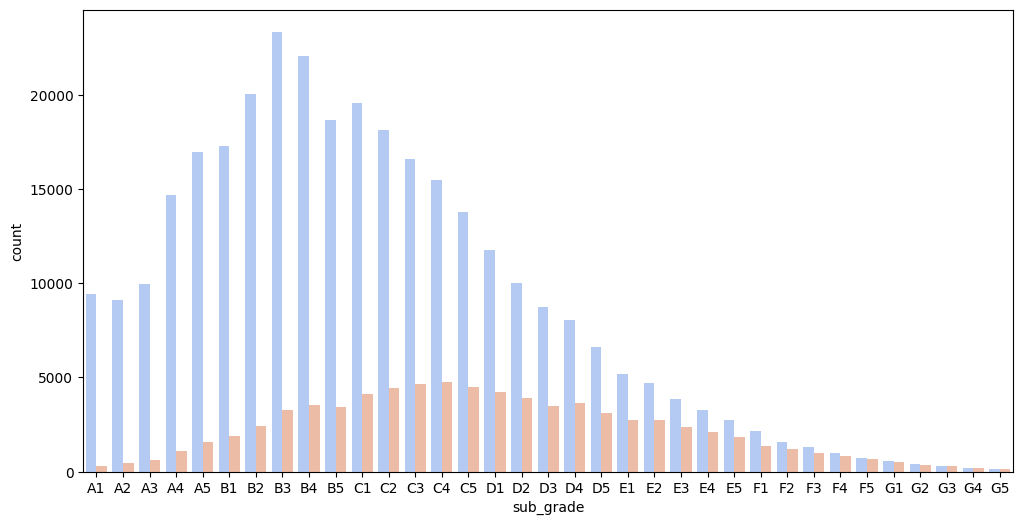

In [13]:
plt.figure(figsize=(12,6))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', hue='loan_status', data=df, order=subgrade_order, palette='coolwarm', legend=False)

<Axes: xlabel='sub_grade', ylabel='count'>

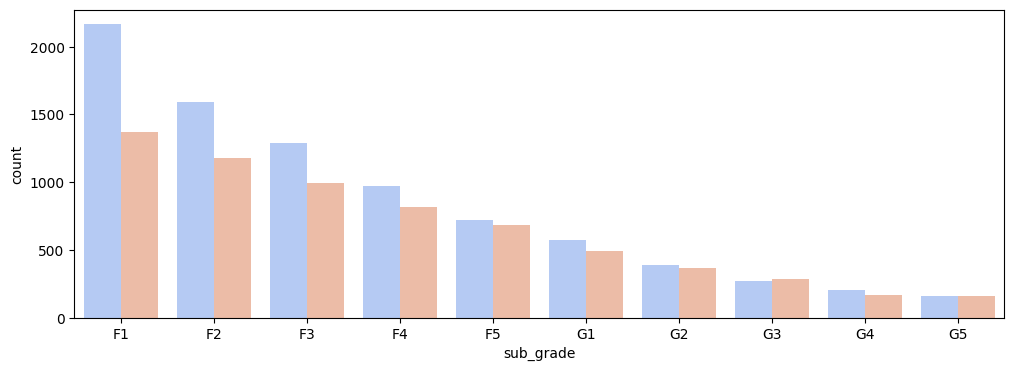

In [14]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())  
sns.countplot(x='sub_grade', hue='loan_status', data=f_and_g, order=subgrade_order, palette='coolwarm', legend=False)

In [15]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid' : 1, 'Charged Off' : 0})

In [16]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [17]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [18]:
len(df)

396030

In [19]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [20]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [21]:
df['emp_title'].nunique()

173105

In [22]:
df['emp_title'].value_counts()

emp_title
Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
Social Work/Care Manager           1
Regional Counsel                   1
Nor-Com Inc                        1
Director of the Bach Society       1
SPO II                             1
Name: count, Length: 173105, dtype: int64

In [23]:
df = df.drop('emp_title', axis=1)

In [24]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [25]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

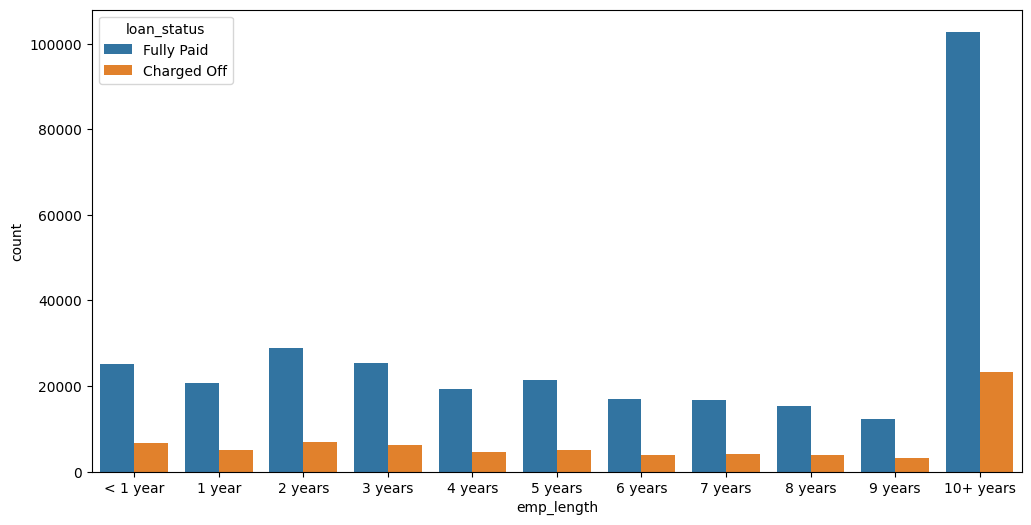

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',order=emp_length_order , data=df, hue='loan_status')

In [27]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [28]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [29]:
emp_len = emp_co / (emp_co + emp_fp)

In [30]:
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

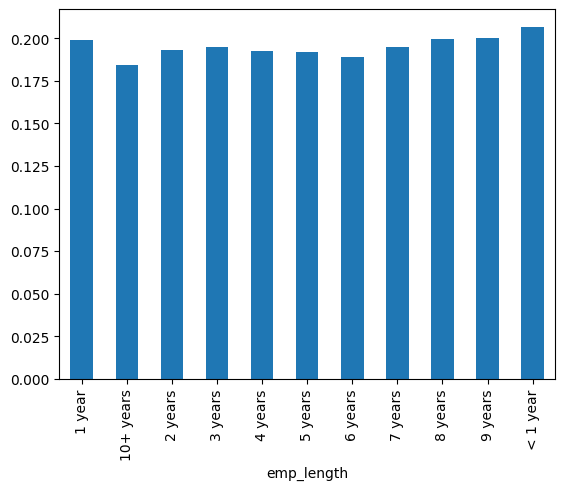

In [31]:
emp_len.plot(kind='bar')

In [32]:
df = df.drop('emp_length', axis=1)

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [35]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [36]:
df = df.drop('title', axis=1)

In [37]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
26.0         2
32.0         2
31.0         2
23.0         2
34.0         1
28.0         1
30.0         1
Name: count, dtype: int64

In [38]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [39]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [40]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [41]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [42]:
df = df.dropna()

In [43]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [44]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [45]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [46]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [47]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [48]:
df = df.drop('grade', axis=1)

In [49]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

df = pd.concat([df.drop('sub_grade', axis=1),dummies],axis=1)

In [50]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [51]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1),dummies],axis=1)

In [52]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [53]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [54]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1),dummies],axis=1)

In [55]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [56]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [57]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [58]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1),dummies],axis=1)

In [59]:
df = df.drop('address', axis=1)

In [60]:
df = df.drop('issue_d', axis=1)

In [61]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [62]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1950        3
1951        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df = df.drop('loan_status', axis=1)

In [65]:
X = df.drop('loan_repaid', axis=1)

In [66]:
y = df['loan_repaid']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
X_train = scaler.fit_transform(X_train)

In [71]:
X_test = scaler.transform(X_test)

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [73]:
X_train.shape

(316175, 78)

In [74]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [75]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
         validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3612 - val_loss: 0.2648
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2658 - val_loss: 0.2635
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2638 - val_loss: 0.2625
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2624 - val_loss: 0.2631
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2605 - val_loss: 0.2618
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2612 - val_loss: 0.2620
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2599 - val_loss: 0.2614
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2599 - val_loss: 0.2613
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2589 - val_loss: 0.2613
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2581 - val_loss: 0.2614
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2587 - val_loss: 0.2616
Epoch 12/25
1236/1236 ━━━━━━━━

In [76]:
losses = pd.DataFrame(model.history.history)

<Axes: >

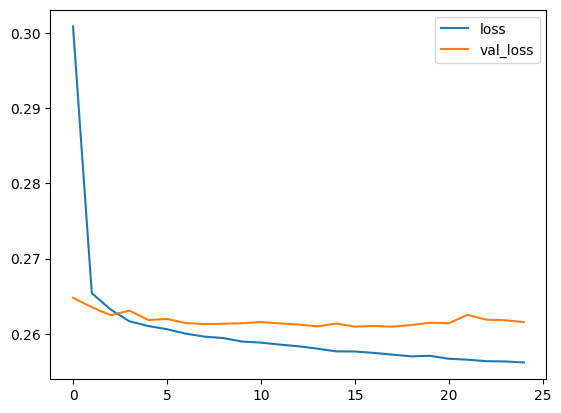

In [77]:
losses.plot()

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step


In [80]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [81]:
df['loan_repaid'].value_counts()

loan_repaid
1    317696
0     77523
Name: count, dtype: int64

In [82]:
317696/len(df)

0.8038479931379817

In [83]:
print(confusion_matrix(y_test, predicted_classes))

[[ 6927  8731]
 [  169 63217]]


In [84]:
model.save('../models/lending_club_model.keras')

In [85]:
import joblib

In [86]:
joblib.dump(scaler, '../models/lending_club_scaler.pkl')

['../models/lending_club_scaler.pkl']

In [87]:
from tensorflow.keras.models import load_model

In [88]:
lending_club_model = load_model('../models/lending_club_model.keras')
lending_club_scaler = joblib.load('../models/lending_club_scaler.pkl')

In [89]:
features = df.columns.tolist()
print(features)

['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified', 'verification_status_Verified', 'application_type_INDIVIDUAL', 'application_type_JOINT', 'initial_list_status_w', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700']


In [90]:
sample_json = {
    "loan_amnt": 15000,
    "term": 36,
    "int_rate": 13.56,
    "installment": 512.34,
    "annual_inc": 75000,
    "dti": 17.45,
    "earliest_cr_line": 2005,
    "open_acc": 10,
    "pub_rec": 0,
    "revol_bal": 8500,
    "revol_util": 47.8,
    "total_acc": 29,
    "mort_acc": 2,
    "pub_rec_bankruptcies": 0,

    "A2": 0, "A3": 0, "A4": 0, "A5": 0,
    "B1": 0, "B2": 0, "B3": 1, "B4": 0, "B5": 0,
    "C1": 0, "C2": 0, "C3": 0, "C4": 0, "C5": 0,
    "D1": 0, "D2": 0, "D3": 0, "D4": 0, "D5": 0,
    "E1": 0, "E2": 0, "E3": 0, "E4": 0, "E5": 0,
    "F1": 0, "F2": 0, "F3": 0, "F4": 0, "F5": 0,
    "G1": 0, "G2": 0, "G3": 0, "G4": 0, "G5": 0,

    "verification_status_Source Verified": 0,
    "verification_status_Verified": 1,

    "application_type_INDIVIDUAL": 1,
    "application_type_JOINT": 0,

    "initial_list_status_w": 1,

    "purpose_credit_card": 0,
    "purpose_debt_consolidation": 1,
    "purpose_educational": 0,
    "purpose_home_improvement": 0,
    "purpose_house": 0,
    "purpose_major_purchase": 0,
    "purpose_medical": 0,
    "purpose_moving": 0,
    "purpose_other": 0,
    "purpose_renewable_energy": 0,
    "purpose_small_business": 0,
    "purpose_vacation": 0,
    "purpose_wedding": 0,

    "OTHER": 0,
    "OWN": 0,
    "RENT": 1,

    "05113": 0,
    "11650": 0,
    "22690": 0,
    "29597": 0,
    "30723": 1,
    "48052": 0,
    "70466": 0,
    "86630": 0,
    "93700": 0
}

In [91]:
def return_lending_club_prediction(model, scaler, sample_json):
    sample_json.pop('loan_repaid', None)

    feature_order = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'earliest_cr_line',
                     'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
                     'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
                     'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
                     'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
                     'verification_status_Source Verified', 'verification_status_Verified',
                     'application_type_INDIVIDUAL', 'application_type_JOINT', 'initial_list_status_w',
                     'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational',
                     'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
                     'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy',
                     'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
                     'OTHER', 'OWN', 'RENT',
                     '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700']


    applicant = pd.DataFrame([sample_json])
    applicant = applicant.reindex(columns=feature_order, fill_value=0)

    applicant_scaled = scaler.transform(applicant)

   
    prediction = model.predict(applicant_scaled)
    predicted_class = int(np.ravel(prediction)[0])  


    if hasattr(model, 'predict_proba'):
        prediction_proba = model.predict_proba(applicant_scaled)
        return {
            "predicted_class": predicted_class,
            "probability_default": float(prediction_proba[0][0]),
            "probability_repaid": float(prediction_proba[0][1])
        }
    else:
        return {
            "predicted_class": predicted_class
        }


result = return_lending_club_prediction(model, scaler, sample_json)
print("Prediction result:")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction result:
{'predicted_class': 0}
